HR-аналитики компании «Работа с заботой» хотят использовать машинное обучение, чтобы предсказывать:

Уровень удовлетворённости сотрудников (0–1) на основе их характеристик.

Риск увольнения (отток), так как неудовлетворённость часто приводит к внезапным уходам.

**Почему это важно?**

Сбор данных через опросы трудоёмок (нужно охватить всех сотрудников).

Предсказание проблем заранее помогает удержать ценных сотрудников и снизить риски для бизнеса.

**Задачи:**

1. Построить регрессионную модель для прогноза удовлетворённости.

2. Построить классификационную модель для прогноза увольнений.

3. Проанализировать ключевые факторы, влияющие на эти показатели.

**Цель:**
Автоматизировать анализ HR-данных для проактивного управления персоналом и снижения финансовых потерь.

## Задача 1: предсказание уровня удовлетворённости сотрудника

###  Загрузка данных

In [ ]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import (
    LinearRegression,
    ElasticNet,
    LogisticRegression,
    Lasso
)
from sklearn.tree import (
    DecisionTreeRegressor,
    DecisionTreeClassifier
)
from sklearn.svm import SVR
from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier,
    GradientBoostingRegressor
)
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import(
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    LabelEncoder
)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (
    RandomizedSearchCV,
    GridSearchCV,
    train_test_split
)
from sklearn.metrics import (
    accuracy_score,
    make_scorer,
    roc_auc_score

)

from phik.report import plot_correlation_matrix
from phik import report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Загрузим файлы с данными
try:
    train_job_satis_rate = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    test_features = pd.read_csv('/datasets/test_features.csv')
    test_target_job_satis_rate = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
except:
    job_satis_rate = pd.read_csv("C:\\Users\\Антон\\train_job_satisfaction_rate.csv")
    test_features = pd.read_csv("C:\\Users\\Антон\\test_features.csv")
    test_target_job_satis_rate = pd.read_csv("C:\\Users\\Антон\\test_target_job_satisfaction_rate.csv")


In [ ]:
dataset_dict = {
    'train_job_satis_rate': train_job_satis_rate,
    'test_features': test_features,
    'test_target_job_satis_rate': test_target_job_satis_rate
}

In [ ]:
def read_data(dataset_dict):
    for k, v in dataset_dict.items():
        print(f"Датасет {k}")
        display(v.head())
        print(f'Кол-во строк = {v.shape[0]}, кол-во столбцов = {v.shape[1]}')
        print()

In [ ]:
read_data(dataset_dict)

Датасет train_job_satis_rate


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


Кол-во строк = 4000, кол-во столбцов = 10

Датасет test_features


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Кол-во строк = 2000, кол-во столбцов = 9

Датасет test_target_job_satis_rate


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Кол-во строк = 2000, кол-во столбцов = 2



__Описание данных__:          

* id — уникальный идентификатор сотрудника;  
* dept — отдел, в котором работает сотрудник;  
* level — уровень занимаемой должности;  
* workload — уровень загруженности сотрудника;  
* employment_years — длительность работы в компании (в годах);  
* last_year_promo — показывает, было ли повышение за последний год;  
* last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;  
* supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;  
* salary — ежемесячная зарплата сотрудника;  
* __job_satisfaction_rate__ — уровень удовлетворённости сотрудника работой в компании, __целевой признак__.  

__Вывод по загрузке данных__:
1. Загрузили данные;
2. Проанализировали датасеты.

###  Предобработка данных

In [ ]:
# Выводим общую информацию по данным
def check_info(dataset_dict):
    for k, v in dataset_dict.items():
        print(f"Датасет {k}", '\n')
        v.info()
        print()

In [ ]:
check_info(dataset_dict)

Датасет train_job_satis_rate 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB

Датасет test_features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count 

В первых двух датасетах видим пропуски. В последнем - нет пропусков.

Поработаем с дубликатами:

In [ ]:
def check_duplicates(dataset_dict):
    for k, v in dataset_dict.items():
        print(f'Количество дубликатов в таблице {k} : {v.duplicated().sum()}')

In [ ]:
check_duplicates(dataset_dict)

Количество дубликатов в таблице train_job_satis_rate : 0
Количество дубликатов в таблице test_features : 0
Количество дубликатов в таблице test_target_job_satis_rate : 0


Видим, что дубликатов нет

Посмотрим уникальные значения:

In [ ]:
def check_unique(dataset_dict):
    for k, v in dataset_dict.items():
        print(k)
        for column in v.drop('id', axis=1).columns.to_list():
            print(v[column].value_counts(), '\n')

In [ ]:
check_unique(dataset_dict)

train_job_satis_rate
sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64 

junior    1894
middle    1744
sinior     358
Name: level, dtype: int64 

medium    2066
low       1200
high       734
Name: workload, dtype: int64 

1     966
2     785
3     483
4     384
5     380
7     301
6     287
8     193
9     130
10     91
Name: employment_years, dtype: int64 

no     3880
yes     120
Name: last_year_promo, dtype: int64 

no     3441
yes     559
Name: last_year_violations, dtype: int64 

4    1603
3    1263
5     546
2     387
1     201
Name: supervisor_evaluation, dtype: int64 

24000    187
27600    184
26400    167
21600    167
28800    164
        ... 
85200      1
91200      1
97200      1
74400      1
98400      1
Name: salary, Length: 68, dtype: int64 

0.65    94
0.67    90
0.68    85
0.69    84
0.66    81
        ..
0.94     4
0.04     4
0.98     3
0.03     3
1.00     2
Name: job_satisfaction_rate, Length: 98, 

Заметим, в таблице test_features есть значения в виде пустых строк: колонки dept и workload. Заменим на nan, затем заполним

In [ ]:
# Обработка пропусков
train_job_satis_rate[['dept', 'level']].head(10)

,dept,level
0,sales,junior
1,hr,junior
2,sales,junior
3,technology,junior
4,hr,junior
5,hr,middle
6,sales,sinior
7,purchasing,middle
8,hr,junior
9,technology,middle


In [ ]:
test_features.loc[test_features['dept'] == ' ', 'dept'] = np.nan

In [ ]:
test_features.isna().sum()

id                       0
dept                     3
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [ ]:
test_features.loc[test_features['workload'] == ' ', 'workload'] = np.nan

In [ ]:
test_features.isna().sum()

id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

Так же заметим, что слово sinior написано неверно. Заменим sinior на senior

In [ ]:
for dataset in [train_job_satis_rate, test_features]:
    dataset['level'] = dataset['level'].replace('sinior', 'senior')
    print(dataset['level'].value_counts())
    print()

junior    1894
middle    1744
senior     358
Name: level, dtype: int64

junior    974
middle    854
senior    171
Name: level, dtype: int64



__Выводы по предобработке данных__:    
1. Изучили общую информацию по каждому датасету;
2. Поменяли sinior -> senior;
3. Проверили наличие дубликатов - их нет.

### Исследовательский анализ данных

In [ ]:
# Проведем статистический анализ признаков
def check_describe(dataset_dict):
    for k, v in dataset_dict.items():
        print(k)
        display(v.drop('id', axis=1).describe(include='all')) # категориальные + количественные

In [ ]:
check_describe(dataset_dict)

train_job_satis_rate


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
count,3994,3996,4000,4000.000000,4000,4000,4000.000000,4000.000000,4000.000000
unique,5,3,3,NaN,2,2,NaN,NaN,NaN
top,sales,junior,medium,NaN,no,no,NaN,NaN,NaN
freq,1512,1894,2066,NaN,3880,3441,NaN,NaN,NaN
mean,NaN,NaN,NaN,3.718500,NaN,NaN,3.476500,33926.700000,0.533995
std,NaN,NaN,NaN,2.542513,NaN,NaN,1.008812,14900.703838,0.225327
min,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,12000.000000,0.030000
25%,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000,22800.000000,0.360000
50%,NaN,NaN,NaN,3.000000,NaN,NaN,4.000000,30000.000000,0.560000
75%,NaN,NaN,NaN,6.000000,NaN,NaN,4.000000,43200.000000,0.710000


test_features


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
count,1997,1999,1999,2000.000000,2000,2000,2000.000000,2000.000000
unique,5,3,3,NaN,2,2,NaN,NaN
top,sales,junior,medium,NaN,no,no,NaN,NaN
freq,763,974,1043,NaN,1937,1738,NaN,NaN
mean,NaN,NaN,NaN,3.666500,NaN,NaN,3.526500,34066.800000
std,NaN,NaN,NaN,2.537222,NaN,NaN,0.996892,15398.436729
min,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,12000.000000
25%,NaN,NaN,NaN,1.000000,NaN,NaN,3.000000,22800.000000
50%,NaN,NaN,NaN,3.000000,NaN,NaN,4.000000,30000.000000
75%,NaN,NaN,NaN,6.000000,NaN,NaN,4.000000,43200.000000


test_target_job_satis_rate


,job_satisfaction_rate
count,2000.00000
mean,0.54878
std,0.22011
min,0.03000
25%,0.38000
50%,0.58000
75%,0.72000
max,1.00000


1. __train_job_satis_rate:__   
Посмотрев на стандартное отклонение (std) по каждому признаку, видим, что в данных нет большого разброса относительно их среднего значения.

2. __test_features:__   
Та же самая ситуация.

3. __test_target_job_satis_rate:__   
Аналогично.

Посмотрим на распределение данных

In [ ]:
def plot_box(dataset):
    """Фукнция построения диаграммы размаха"""
    for col in dataset.drop('id', axis=1).select_dtypes(exclude='object').columns.to_list():
        plt.boxplot(dataset[col])
        plt.title(col, fontsize=14)
        plt.ylabel(col)
        plt.show()

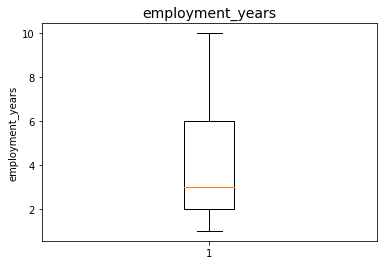

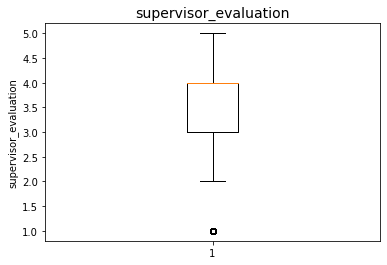

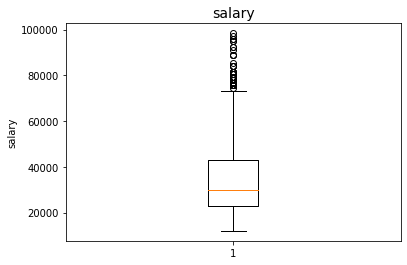

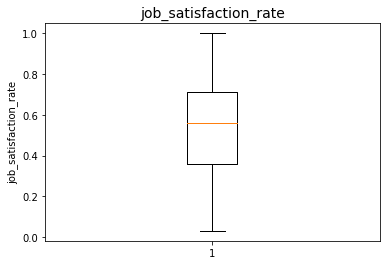

In [ ]:
plot_box(train_job_satis_rate)

Количество выбросов небольшое, их удалять не будем.

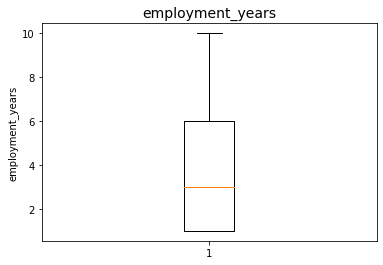

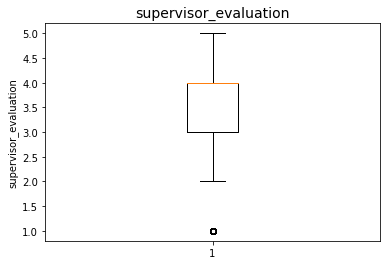

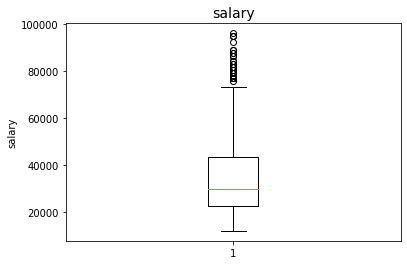

In [ ]:
plot_box(test_features)

Та же самая ситуация.

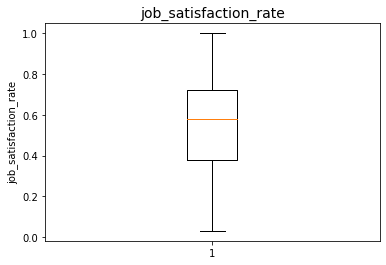

In [ ]:
plot_box(test_target_job_satis_rate)

Здесь вообще нет выбросов

In [ ]:
def plot_bar(name):
    """
    Функия отображения столбчатой диаграммы
    """
    plt.bar(train_job_satis_rate[name].value_counts().index, train_job_satis_rate[name].value_counts())
    plt.title(name)
    plt.show()

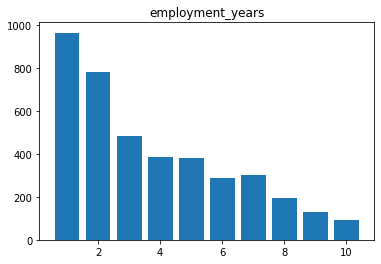

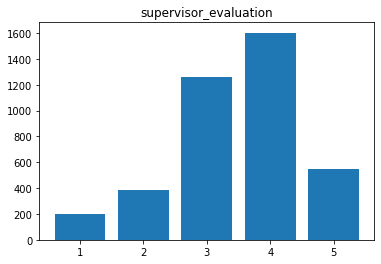

In [ ]:
for i in list(train_job_satis_rate[['employment_years', 'supervisor_evaluation']]):
    plot_bar(i)

В столбце employment_years видим достаточно плавное снижение лет.

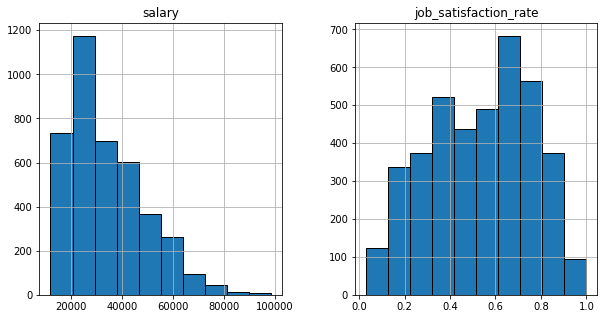

In [ ]:
train_job_satis_rate.drop(['id','employment_years', 'supervisor_evaluation'] , axis=1).hist(figsize=(10, 5), edgecolor='k')
plt.show()

В столбце salary видим пик в диапозоне от 20_000 до 40_000 руб.

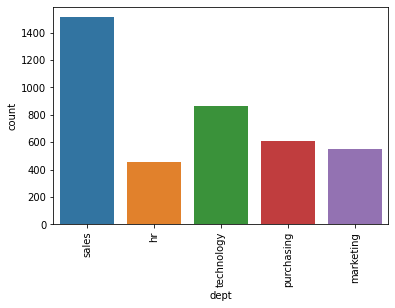

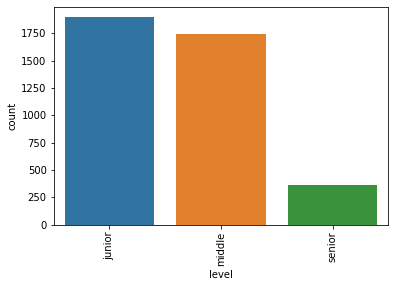

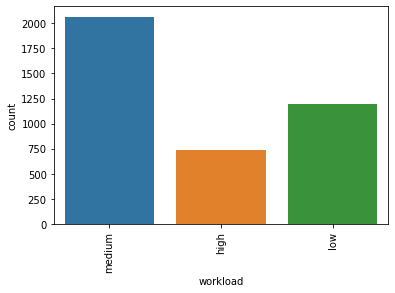

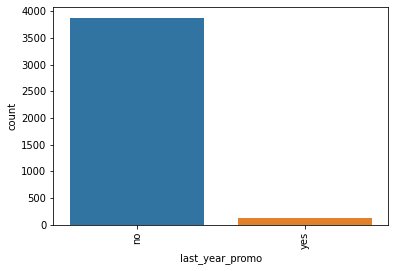

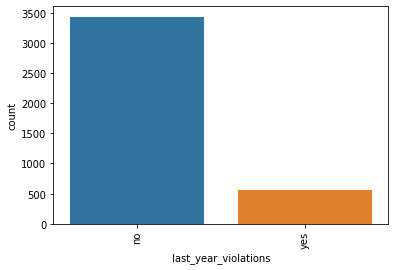

In [ ]:
for name in train_job_satis_rate.select_dtypes('object').columns:
    sns.countplot(x=name, data=train_job_satis_rate)
    plt.xticks(rotation=90)
    plt.show()

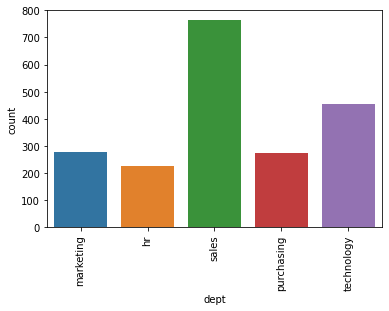

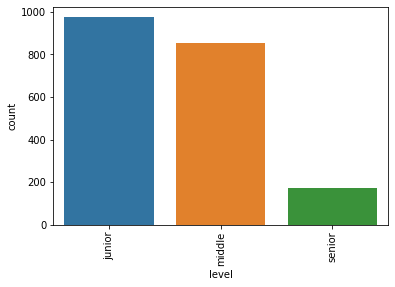

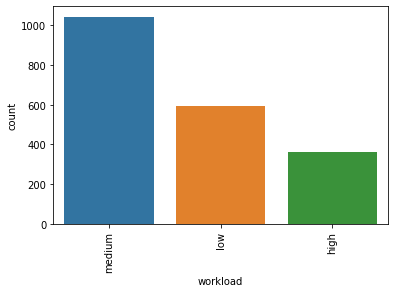

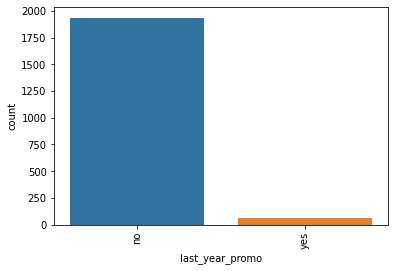

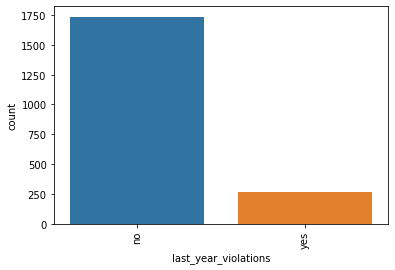

In [ ]:
for name in test_features.select_dtypes('object').columns:
    sns.countplot(x=name, data=test_features)
    plt.xticks(rotation=90)
    plt.show()

__Вывод по исследовательскому анализу данных:__

1) Провели статистический анализ признаков;   
2) Построили графики:

* диаграммы размаха (по ним смотрели выбросы)
* гистограммы (по ним смотрели распредление данных)

3) Выбросы не удаляли, т.к. их количество небольшое.

Построим матрицу корреляции

In [ ]:
corr_matrix = train_job_satis_rate.drop('id', axis=1).corr(method='spearman')

In [ ]:
corr_matrix.style.background_gradient(cmap='coolwarm') # Выводим матрицу корреляции

,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
employment_years,1.000000,-0.001554,0.472688,0.218589
supervisor_evaluation,-0.001554,1.000000,0.003534,0.746608
salary,0.472688,0.003534,1.000000,0.126707
job_satisfaction_rate,0.218589,0.746608,0.126707,1.000000


Видим высокую зависимость между job_satisfaction_rate(уровень удовлетворённости сотрудника работой в компании) и supervisor_evaluation(оценка качества работы сотрудника, которую дал руководитель).   
Так же наблюдаем зависимость между employment_years(длительность работы в компании (в годах)) и salary(зарплата за месяц)

In [ ]:
def phk_matrix(df):
    # вычисление коэффициентов корреляции phi для датафрейма df
    phik_overview = df.phik_matrix()

    # визуализация тепловой карты коэффициентов корреляции
    plot_correlation_matrix(
        phik_overview.values,
        x_labels=phik_overview.columns,
        y_labels=phik_overview.index,
        title=r"correlation $\phi_K$",
        fontsize_factor=1.5,
        figsize=(15, 12)
    )

interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']


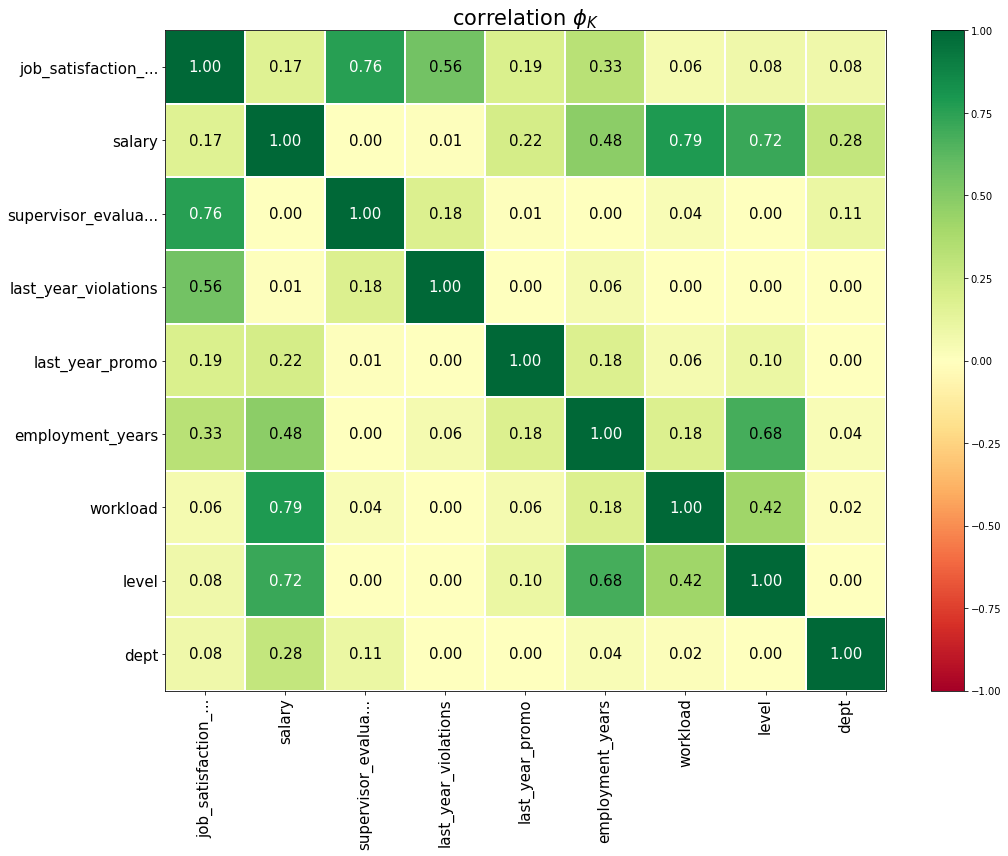

In [ ]:
phk_matrix(train_job_satis_rate.drop('id', axis=1))

Из матрцы зависимостей видим следующее:   
высокая зависимость между:
* salary(ежемесячная зарплата сотрудника) и workload(уровень загруженности сотрудника);
* salary(ежемесячная зарплата сотрудника) и level(уровень занимаемой должности);
* job_satisfaction_rate(уровень удовлетворённости сотрудника работой в компании) и supervisor_evaluation(оценка качества работы сотрудника, которую дал руководитель);
* employment_years(длительность работы в компании (в годах)) и level(уровень занимаемой должности)

### Подготовка данных и обучение моделей

Создадим пайплайн обработки пропусков и кодирования нечисловых признаков

In [ ]:
def smape(y_true, y_pred):
    """
    Вычисляет SMAPE между двумя массивами.
    """
    return 100/(len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))))

In [ ]:
smape_scorer = make_scorer(smape, greater_is_better=False)

In [ ]:
test_features.drop('id', axis=1).head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,marketing,junior,medium,2,no,no,5,28800
1,hr,junior,medium,1,no,no,4,30000
2,sales,middle,low,5,no,no,4,19200
3,sales,middle,low,6,no,no,4,19200
4,hr,middle,medium,5,no,no,5,40800


In [ ]:
train_job_satis_rate

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
...,...,...,...,...,...,...,...,...,...,...
3995,457950,technology,junior,high,2,no,no,3,46800,0.45
3996,957499,sales,junior,medium,2,no,no,4,21600,0.68
3997,533318,sales,middle,low,7,no,no,5,24000,0.76
3998,706868,sales,junior,medium,2,no,no,3,24000,0.48


In [ ]:
RANDOM_STATE = 42
y = train_job_satis_rate['job_satisfaction_rate']
X = train_job_satis_rate.drop(['id', 'job_satisfaction_rate'] , axis=1)


# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + ORD
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ['last_year_promo', 'last_year_violations']),
     ('ord', ord_pipe, ['dept', 'workload', 'level']),
     ('num', MinMaxScaler(), ['employment_years', 'supervisor_evaluation', 'salary'])
    ],
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

param_grid = [
       # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 10),
        'models__min_samples_split': range(1, 10),
        'models__min_samples_leaf': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

        # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'models__fit_intercept': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

        # словарь для модели Lasso()
    {
        'models': [Lasso(random_state=RANDOM_STATE)],
        'models__alpha': [0.001, 0.01, 0.1, 1, 10],
        'models__fit_intercept': [True, False],
        'models__max_iter': [100, 500],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

        # словарь для модели RandomForestRegressor()
    {
        'models': [RandomForestRegressor(random_state=RANDOM_STATE)],
        'models__n_estimators': [10, 50, 100, 200],
        'models__max_depth': [5, 10, 20, 30, 50],
        'models__min_samples_split': [2, 5, 10, 30, 40],
        'models__min_samples_leaf': [1, 2, 4, 10, 20],
        'models__max_features': ['auto', 'sqrt', 'log2'],
        'models__bootstrap': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

        # словарь для модели SVR()
    {
       'models': [SVR()],
        'models__C': [0.1, 1, 10],
        'models__kernel': ['rbf', 'linear', 'poly'],
        'models__degree': [2, 3, 4, 5],  # только для полиномиального ядра
        'models__gamma': [0.1, 1, 10, 20],  # 'scale' и 'auto' только для rbf ядра
        'models__epsilon': [0.1, 0.01, 0.001],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

        # словарь для модели ElasticNet()
    #{
      #  'models': [ElasticNet(random_state=RANDOM_STATE)],
      #  'models__alpha': [0.1, 1, 10, 100],
      #  'models__l1_ratio': [0.0, 0.1, 0.5, 0.9, 1.0],
       # 'models__fit_intercept': [True, False],
       # 'models__max_iter': [100, 1000, 5000],
       # 'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
   # },

      # словарь для модели GradientBoostingRegressor()
   # {
    #    'models': [GradientBoostingRegressor(random_state=RANDOM_STATE)],
     #   'models__n_estimators': [10, 50, 100, 200],
     #   'models__max_depth': [1, 2, 3, 4, 5],
      #  'models__min_samples_split': [2, 5, 10],
       # 'models__min_samples_leaf': [1, 2, 4],
      #  'models__learning_rate': [0.1, 0.01, 0.001],
      #  'models__loss': ['ls', 'lad', 'huber', 'quantile'],
       # 'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    #}
]

random_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring=smape_scorer,
    n_jobs=-1
)
random_search.fit(X, y)
print('Лучшая модель и ее параметры:\n\n', random_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', random_search.best_score_)

Лучшая модель и ее параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                        

Метрика на тренировочной выборке также очень хорошая

In [ ]:
# проверяем работу модели на тестовой выборке
# рассчитываем прогноз на тестовых данных

X_test = test_features.drop('id', axis=1)
y_test = test_target_job_satis_rate['job_satisfaction_rate']

y_pred = random_search.predict(X_test)
print(f'Метрика SMAPE лучшей модели на тестовой выборке: {smape(y_test, y_pred):.4f}')

Метрика SMAPE лучшей модели на тестовой выборке: 0.0001


__Вывод__:
Лучше всего справилась модель DecisionTreeRegressor(max_depth=1, random_state=42)).
DecisionTreeRegressor - это алгоритм регрессии на основе дерева решений. Он строит дерево решений, в котором каждый узел соответствует некоторому условию, а каждый лист - некоторому значению целевой переменной.
Отличительные особенности `DecisionTreeRegressor`:

1. Нелинейная модель: `DecisionTreeRegressor` является нелинейной моделью, которая может моделировать сложные зависимости между переменными.
2. Не требует предварительной обработки данных: `DecisionTreeRegressor` может работать с категориальными и числовыми переменными, а также автоматически обрабатывать пропуски в данных.
3. Интерпретируемость: `DecisionTreeRegressor` является интерпретируемой моделью, так как позволяет визуализировать дерево решений и понять, какие переменные и условия влияют на предсказание.
4. Переобучение: `DecisionTreeRegressor` может переобучиться на тренировочных данных, особенно при большой глубине дерева. Для предотвращения переобучения можно использовать такие методы, как обрезка дерева, подвыборка данных или ансамблирование.
5. Неэффективность при большом количестве переменных: `DecisionTreeRegressor` может работать медленно и неэффективно при большом количестве переменных, особенно при наличии многоуровневых категориальных переменных.


## Задача 2: предсказание увольнения сотрудника из компании

### Загрузка новых данных

In [ ]:
#Загрузим файлы с данными
try:
    train_quite = pd.read_csv('/datasets/train_quit.csv')
    test_features = pd.read_csv('/datasets/test_features.csv')
    test_target_quite = pd.read_csv('/datasets/test_target_quit.csv')
except:
    train_quite = pd.read_csv("C:\\Users\\Антон\\train_quit.csv")
    test_features = pd.read_csv("C:\\Users\\Антон\\test_features.csv")
    test_target_quite = pd.read_csv("C:\\Users\\Антон\\test_target_quit.csv")

In [ ]:
dataset_dict1 = {
    'train_quite': train_quite,
    'test_features': test_features,
    'test_target_quite': test_target_quite
}

In [ ]:
read_data(dataset_dict1)

Датасет train_quite


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


Кол-во строк = 4000, кол-во столбцов = 10

Датасет test_features


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Кол-во строк = 2000, кол-во столбцов = 9

Датасет test_target_quite


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


Кол-во строк = 2000, кол-во столбцов = 2



__Описание данных__:          

* id — уникальный идентификатор сотрудника;  
* dept — отдел, в котором работает сотрудник;  
* level — уровень занимаемой должности;  
* workload — уровень загруженности сотрудника;  
* employment_years — длительность работы в компании (в годах);  
* last_year_promo — показывает, было ли повышение за последний год;  
* last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;  
* supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;  
* salary — ежемесячная зарплата сотрудника;  
* quit — увольнение сотрудника из компании, __целевой признак__.  

__Вывод по загрузке данных__:
1. Загрузили данные;
2. Проанализировали датасеты.

### Предобработка  новых данных

In [ ]:
# Выводим общую информацию по данным
check_info(dataset_dict1)

Датасет train_quite 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB

Датасет test_features 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------              

Видим, что пропуски есть только в датасете test_features

In [ ]:
check_duplicates(dataset_dict1)

Количество дубликатов в таблице train_quite : 0
Количество дубликатов в таблице test_features : 0
Количество дубликатов в таблице test_target_quite : 0


Дубликатов нет

Посмотрим на уникальные значения

In [ ]:
check_unique(dataset_dict1)

train_quite
sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64 

junior    1949
middle    1694
sinior     357
Name: level, dtype: int64 

medium    2118
low       1208
high       674
Name: workload, dtype: int64 

1     985
2     777
3     479
4     393
5     362
7     308
6     296
8     174
9     136
10     90
Name: employment_years, dtype: int64 

no     3887
yes     113
Name: last_year_promo, dtype: int64 

no     3455
yes     545
Name: last_year_violations, dtype: int64 

4    1654
3    1233
5     520
2     391
1     202
Name: supervisor_evaluation, dtype: int64 

24000    200
27600    185
19200    182
26400    180
33600    164
        ... 
94800      2
85200      1
91200      1
86400      1
92400      1
Name: salary, Length: 69, dtype: int64 

no     2872
yes    1128
Name: quit, dtype: int64 

test_features
sales         763
technology    455
marketing     279
purchasing    273
hr            227
                

Заметим, в таблице test_features есть значения в виде пустых строк: колонки dept и workload. Заменим на nan, затем заполним

In [ ]:
test_features.loc[test_features['dept'] == ' ', 'dept'] = np.nan

In [ ]:
test_features.isna().sum()

id                       0
dept                     3
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [ ]:
test_features.loc[test_features['workload'] == ' ', 'workload'] = np.nan

In [ ]:
test_features.isna().sum()

id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

Так же заметим, что слово sinior в колонке level написано неверно. Заменим sinior на senior

In [ ]:
for dataset in [train_quite, test_features]:
    dataset['level'] = dataset['level'].replace('sinior', 'senior')
    print(dataset['level'].value_counts())
    print()

junior    1949
middle    1694
senior     357
Name: level, dtype: int64

junior    974
middle    854
senior    171
Name: level, dtype: int64



__Выводы по предобработке данных__:    
1. Изучили общую информацию по каждому датасету;
2. Поменяли sinior -> senior;
3. Проверили наличие дубликатов - их нет.

### Исследовательский анализ новых данных

In [ ]:
# Проведем статистический анализ признаков
check_describe(dataset_dict1)

train_quite


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
count,4000,4000,4000,4000.000000,4000,4000,4000.000000,4000.000000,4000
unique,5,3,3,NaN,2,2,NaN,NaN,2
top,sales,junior,medium,NaN,no,no,NaN,NaN,no
freq,1438,1949,2118,NaN,3887,3455,NaN,NaN,2872
mean,NaN,NaN,NaN,3.701500,NaN,NaN,3.474750,33805.800000,NaN
std,NaN,NaN,NaN,2.541852,NaN,NaN,1.004049,15152.415163,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,12000.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,NaN,3.000000,22800.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,NaN,4.000000,30000.000000,NaN
75%,NaN,NaN,NaN,6.000000,NaN,NaN,4.000000,43200.000000,NaN


test_features


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
count,1997,1999,1999,2000.000000,2000,2000,2000.000000,2000.000000
unique,5,3,3,NaN,2,2,NaN,NaN
top,sales,junior,medium,NaN,no,no,NaN,NaN
freq,763,974,1043,NaN,1937,1738,NaN,NaN
mean,NaN,NaN,NaN,3.666500,NaN,NaN,3.526500,34066.800000
std,NaN,NaN,NaN,2.537222,NaN,NaN,0.996892,15398.436729
min,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,12000.000000
25%,NaN,NaN,NaN,1.000000,NaN,NaN,3.000000,22800.000000
50%,NaN,NaN,NaN,3.000000,NaN,NaN,4.000000,30000.000000
75%,NaN,NaN,NaN,6.000000,NaN,NaN,4.000000,43200.000000


test_target_quite


,quit
count,2000
unique,2
top,no
freq,1436


1. __train_quite:__   
Посмотрев на стандартное отклонение (std) по каждому признаку, видим, что в данных нет большого разброса относительно их среднего значения.

2. __test_features:__   
Та же самая ситуация

Посмотрим на распределение данных

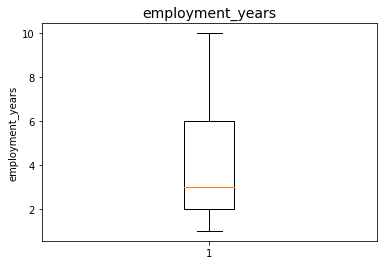

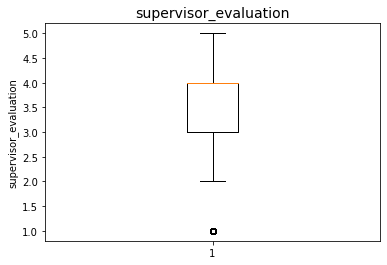

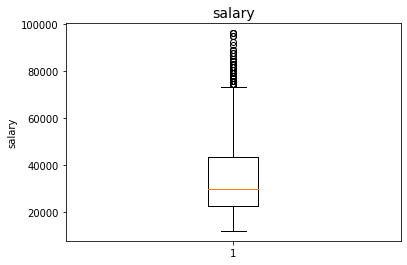

In [ ]:
plot_box(train_quite)

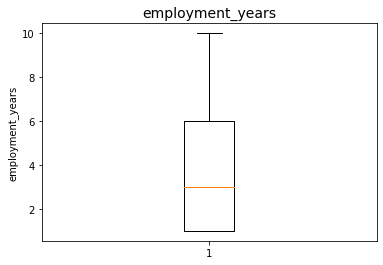

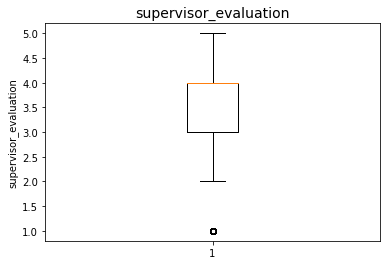

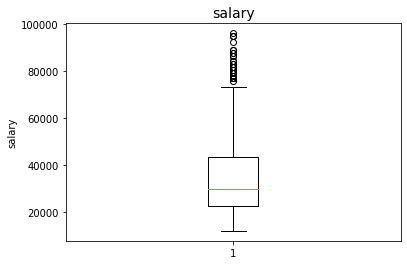

In [ ]:
plot_box(test_features)

In [ ]:
def plot_bar(name):
    """
    Функия отображения столбчатой диаграммы
    """
    plt.bar(train_quite[name].value_counts().index, train_quite[name].value_counts())
    plt.title(name)
    plt.show()

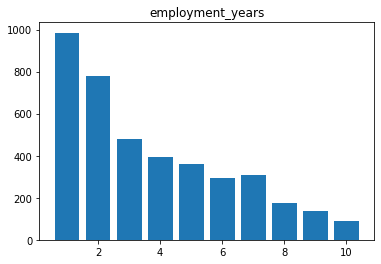

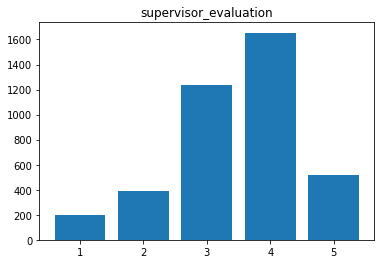

In [ ]:
for i in list(train_quite[['employment_years', 'supervisor_evaluation']]):
    plot_bar(i)

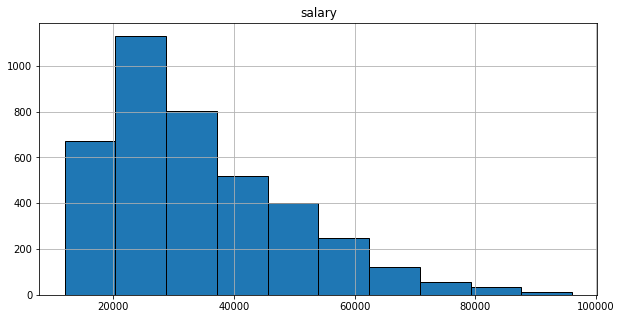

In [ ]:
train_quite.drop(['id','employment_years', 'supervisor_evaluation'] , axis=1).hist(figsize=(10, 5), edgecolor='k')
plt.show()

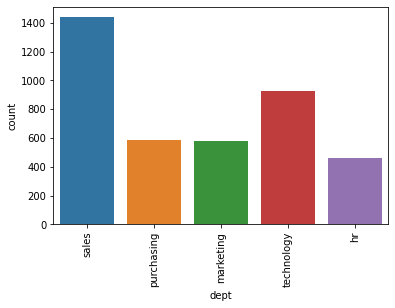

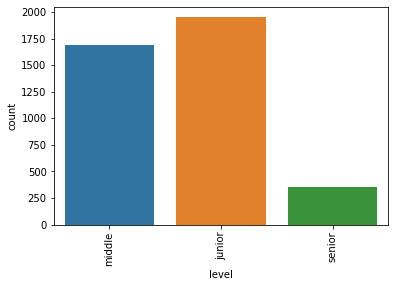

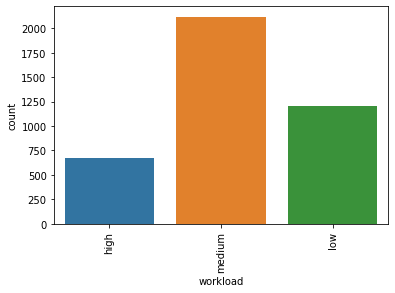

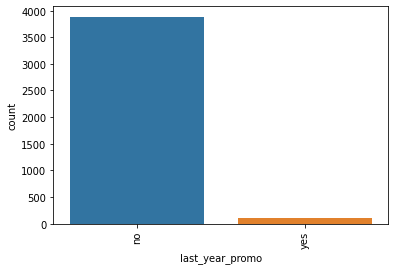

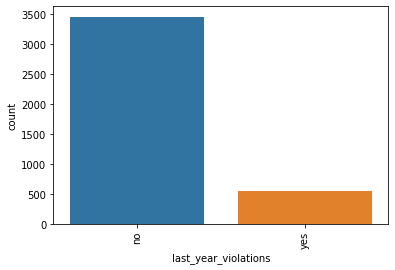

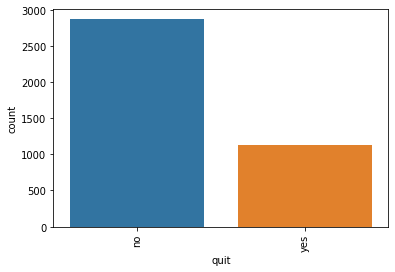

In [ ]:
for name in train_quite.select_dtypes('object').columns:
    sns.countplot(x=name, data=train_quite)
    plt.xticks(rotation=90)
    plt.show()

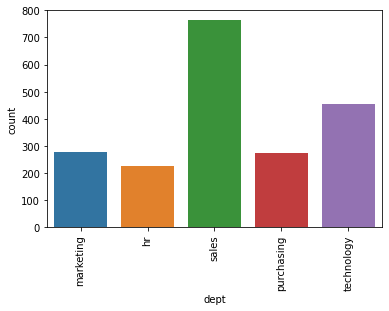

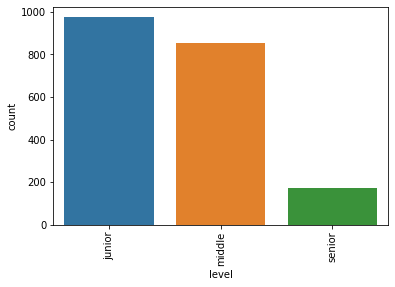

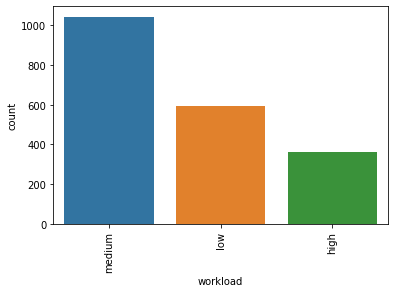

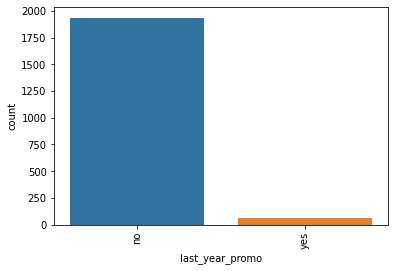

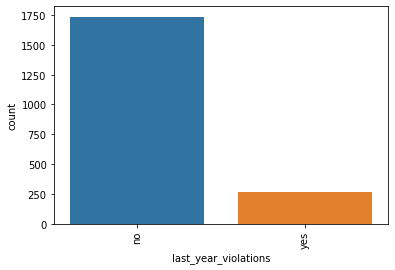

In [ ]:
for name in test_features.select_dtypes('object').columns:
    sns.countplot(x=name, data=test_features)
    plt.xticks(rotation=90)
    plt.show()

Узнаем, в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности

In [ ]:
quit_df = train_quite[train_quite['quit'] == 'yes']
no_quit_df = train_quite[train_quite['quit'] == 'no']
total_df = train_quite

grouped_df = quit_df.groupby(['dept', 'workload'])

quit_ratio_df = grouped_df.size().to_frame('quit_count')
quit_ratio_df['no_quit_count'] = no_quit_df.groupby(['dept', 'workload']).size()
quit_ratio_df['total_count'] = total_df.groupby(['dept', 'workload']).size()
quit_ratio_df['quit_ratio'] = round(quit_ratio_df['quit_count'] / quit_ratio_df['total_count'], 3)
quit_ratio_df

quit_count  no_quit_count  total_count  quit_ratio
dept       workload                                                    
hr         high               7             66           73       0.096
           low               65             78          143       0.455
           medium            44            204          248       0.177
marketing  high              20             89          109       0.183
           low               71            102          173       0.410
           medium            72            228          300       0.240
purchasing high              21             71           92       0.228
           low               75             98          173       0.434
           medium            70            253          323       0.217
sales      high              43            208          251       0.171
           low              187            246          433       0.432
           medium           177            577          754       0.235
technology high              30            119          149       0.201
           low              121            165          286       0.423
           medium           125            368          493       0.254

Таблица:
* quit_count - кол-во уволившихся
* no_quit_count - кол-во оставшихся
* total_count - общее кол-во

Наибольшее значение доли уволившихся сотрудников в HR-отделе с низкой(low) загруженностью

In [ ]:
train_quite[train_quite['workload'] == 'low'].head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
5,699916,sales,junior,low,1,no,yes,3,18000,yes
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
12,114153,marketing,junior,low,3,no,no,4,16800,no
17,458930,sales,middle,low,5,no,no,4,24000,no


Наибольшее количество сотрудников уволняются с работы с низкой загруженностью. Если посмотреть на количество лет работы в компании и на то, было ли повышение на все это время повышения сотрудники не получали, следовательно, ежемесячные заработные платы не увеличивались. Это и может приводить к большому количеству увольнений.

In [ ]:
train_quite[train_quite['workload'] == 'medium'].head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
6,417070,technology,middle,medium,8,no,no,2,44400,no


In [ ]:
train_quite[train_quite['workload'] == 'high'].head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
10,832644,sales,middle,high,3,no,no,4,57600,no
16,113657,technology,senior,high,5,yes,no,3,82800,no
26,684985,sales,middle,high,6,no,no,4,54000,no
31,126017,purchasing,middle,high,7,no,no,3,54000,no


Сравним среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.

In [ ]:
print(f"среднее значение зарплаты тех, кто остался в компании: {train_quite[train_quite['quit'] == 'no']['salary'].mean():.0f} руб.")

среднее значение зарплаты тех, кто остался в компании: 37702 руб.


In [ ]:
print(f"среднее значение зарплаты тех, кто ушел из компании компании: {train_quite[train_quite['quit'] == 'yes']['salary'].mean():.0f} руб.")

среднее значение зарплаты тех, кто ушел из компании компании: 23885 руб.


Видим, что среднее значение зарплаты у тех, кто остался в компании больше, чем у тех, кто ушел из нее.

Визуализируем и сравним распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников.

In [ ]:
df = test_target_job_satis_rate.merge(test_target_quite, on='id')

In [ ]:
df.head()

,id,job_satisfaction_rate,quit
0,130604,0.74,no
1,825977,0.75,no
2,418490,0.60,yes
3,555320,0.72,no
4,826430,0.08,yes


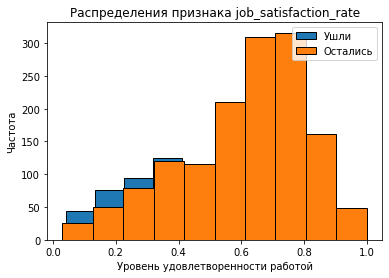

In [ ]:
plt.hist(df[df['quit'] == 'yes']['job_satisfaction_rate'], label='Ушли', edgecolor='k')

plt.hist(df[df['quit'] == 'no']['job_satisfaction_rate'], label='Остались', edgecolor='k')

plt.legend(loc='upper right')

plt.title('Распределения признака job_satisfaction_rate')

plt.xlabel('Уровень удовлетворенности работой')

plt.ylabel('Частота')

plt.show()

Видим, что ушло примерно 130 сотрудников с уровнем удовлетворенности от 0.1 до 0.4. Наблюдаем пик в 300 сотрудников с уровнем удовлетворенности от 0.6 до 0.8

### Добавление нового входного признака

Добавим job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

In [ ]:
df1 = test_features.merge(test_target_job_satis_rate, on='id')

In [ ]:
new_df = df1.merge(test_target_quite, on='id')

In [ ]:
new_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
1,686555,hr,junior,medium,1,no,no,4,30000,0.72,no
2,467458,sales,middle,low,5,no,no,4,19200,0.64,no
3,418655,sales,middle,low,6,no,no,4,19200,0.60,no
4,789145,hr,middle,medium,5,no,no,5,40800,0.75,no


interval columns not set, guessing: ['employment_years', 'supervisor_evaluation', 'salary']


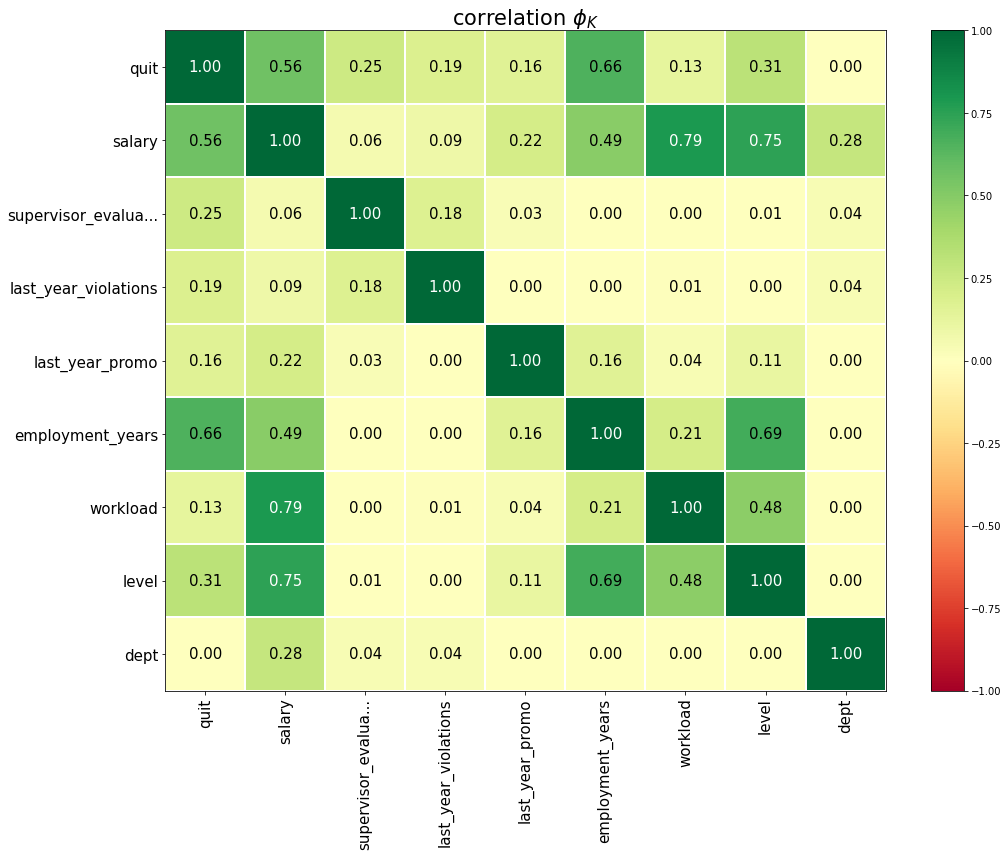

In [ ]:
phk_matrix(train_quite.drop('id', axis=1))

### Подготовка данных и обучение новой модели

In [ ]:
RANDOM_STATE = 42
y = train_quite['quit']
X = train_quite.drop(['id', 'quit'], axis=1)

# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='error'))
    ]
    )

# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + ORD
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ['last_year_promo', 'last_year_violations']),
     ('ord', ord_pipe, ['dept', 'level', 'workload']),
     ('num', MinMaxScaler(), ['employment_years', 'supervisor_evaluation', 'salary'])
    ],
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))]
)

param_grid = [
    # словарь для  модели DecisionTreeClassifier
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 20),
        'models__min_samples_split': range(2, 21),
        'models__min_samples_leaf': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для  модели RandomForestClassifier
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [100, 200, 300],
        'models__max_depth': [None, 10, 20],
        'models__min_samples_split': [2, 5, 10],
        'models__min_samples_leaf': [1, 2, 4],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }

]

random_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
random_search.fit(X, y)
print('Лучшая модель и ее параметры:\n\n', random_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', random_search.best_score_)


Лучшая модель и ее параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                        

In [ ]:
X_test = new_df.drop(['id', 'job_satisfaction_rate', 'quit'], axis=1)
y_test = new_df['quit']

y_test_pred_proba = random_search.predict_proba(X_test)


y_test_pred = y_test_pred_proba[:, 1]

# вычислите метрику ROC-AUC на тестовой выборке
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score_test}')

Метрика ROC-AUC на тестовой выборке: 0.9235625456844268


__Вывод:__ Лучшей оказалась модель - `DecisionTreeClassifier`(max_depth=10, min_samples_leaf=17,
                                        min_samples_split=11,
                                        random_state=42))

Основные преимущества `DecisionTreeClassifier`:

* Интерпретируемость: дерево решений легко визуализировать и понять, как алгоритм принимает решения.
* Быстрая тренировка: алгоритм тренируется быстро, особенно при использовании небольших данных.
* Гибкость: алгоритм может обрабатывать как категориальные, так и числовые признаки, а также может работать с пропусками в данных.

__Общий вывод__:  
Задача 1 и задача 2:   
1) Провели первичный анализ данных;  
2) Провели предобработку данных:  

* Изучили общую информацию по каждому датасету;  
* поменяли sinior -> senior;  
* проверили наличие дубликатов - их нет.  

3) Провели исследовательский анализ данных:   
* Провели статистический анализ признаков;  
* Построили графики:   
* диаграммы размаха (по ним смотрели выбросы);
* гистограммы (по ним смотрели распредление данных);
* выбросы не удаляли, т.к. их количество небольшое(обработаем их в пайплайне).  

4) Построили пайплайны и обучили модели:  
1) задача 1:

*  Лучше всего справилась модель DecisionTreeRegressor;   

2) задача 2:  

* Лучшей оказалась модель - DecisionTreeClassifier.

Дополнительные предложения для бизнеса:  
Чтобы количества увольнений было меньше, следует обратить внимание на сотрудников с низкой загруженностью, на их время работы в компании и заработную плату. А именно, стоит повышать сотрудников в должности, тем самым стимулируя их желание остаться в компании и продолжать работать.